# Dimensionality reduction
***

Dimensionality reduction is a crucial step in unsupervised machine learning, aiming to reduce the number of features (dimensions) in a high-dimensional dataset while preserving the essential information.
***

- **Principal component analysis (PCA):** A linear technique that projects high-dimensional data onto a lower-dimensional space, retaining most of the variance.
- **Singular value decomposition (SVD):** Is a powerful unsupervised learning technique in machine learning, widely used for dimensionality reduction, data compression, noise reduction, feature extraction, and latent factor analysis.
- **Autoencoders:** Autoencoders are a type of neural network used for unsupervised learning, specifically designed to learn efficient representations of unlabeled data. They consist of two main components: an encoder (or encoder network) and a decoder (or decoder network).

> **Encoder:** Maps the input data to a lower-dimensional representation, called the bottleneck or latent representation. This process is known as dimensionality reduction, as the encoder compresses the input data into a more compact form.
           
> **Decoder:** Maps the bottleneck representation back to the original input data, attempting to reconstruct the original input as accurately as possible. This process is known as reconstruction.

## Lets start exploring PCA

In this part we will start using images for prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [2]:
dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

<Figure size 640x480 with 0 Axes>

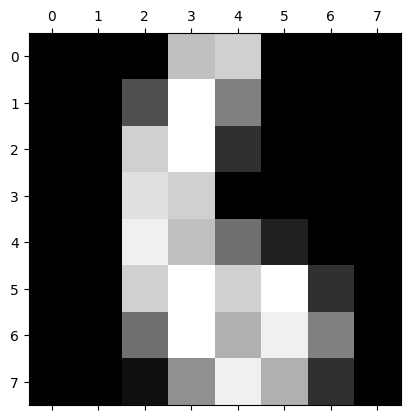

In [3]:
plt.gray()
plt.matshow(dataset.data[6].reshape(8,8))

In [4]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [6]:
X = df
y = dataset.target
print(X.head())
print(y)

   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        5.0        0.0   
3        0.0        0.0        0.0        8.0  ...        9.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0        0.0        0.0        6.0       13.0

### Scale the data

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

### Now lets prepare:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [9]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Score:

In [10]:
logistic.score(X_test, y_test)

0.9703703703703703

Not bad.
### Now let's see with PCA

In [11]:
pca = PCA(0.95) # the 0.95 means that retain the 95% of useful information and then create the new features

In [12]:
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [13]:
X.shape

(1797, 64)

Now we have 29 columns instead of 64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)


In [15]:
logistic_pca = LogisticRegression(max_iter=1000)
logistic_pca.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
logistic_pca.score(X_test, y_test)

0.9592592592592593

As we can see the score is similar to the score without the PCA and it seems not to be very useful but the fact that I have kept most of the score and reduced 35 columns makes the model very optimized. 